## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("multiple_linear_regression.csv")

In [3]:
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.shape

(200, 4)

In [5]:
data.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- Since there is no null values no point is dropping null values

### Splitting Data

In [6]:
output_col = "Target"

In [7]:
# input data
x = data.iloc[:,data.columns != output_col]

In [8]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
# output data
y = data.loc[:,output_col]

In [10]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 43)

In [13]:
x_train.shape

(140, 3)

In [14]:
x_test.shape

(60, 3)

# <font color= 'green'>Multiple Linear Regression</font>

## Training Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [18]:
lr.intercept_

3.077774495528045

## Predicting Input Test

In [19]:
predicted_value = lr.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
cost = mean_squared_error(y_test,predicted_value)
cost

2.2412862530933477

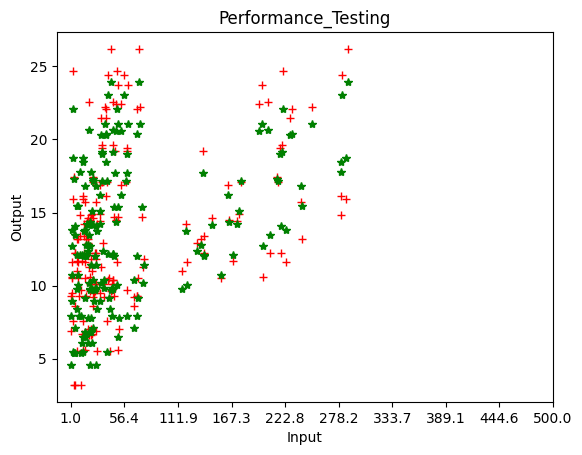

In [22]:
plt.plot(x_test,y_test,"+",color = 'red')
plt.plot(x_test,predicted_value,"*",color = 'green')
plt.title("Performance_Testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predicted_value))

0.9220854203535253
